# Laboratorio 4 - Inteligencia Artificial

## Autores:

- Nelson García
- Andy Fuentes
- Davis Roldan
- Ricardo Chuy
- Diederich Solís

## Task 1 - Preguntas teóricas

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

#### Task 2.1.1 - K-Means

Se importan las librerías a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

Se lee el dataset.

In [2]:
dataset = pd.read_csv('documents/bank_transactions.csv')

Visualizar los datos.

In [3]:
dataset.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
dataset.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


##### Elección de variables

Saldo de la Cuenta del Cliente (CustAccountBalance)

El saldo de la cuenta es un indicador clave del poder adquisitivo y el comportamiento financiero del cliente. Puede ayudar a distinguir entre clientes de alto, medio y bajo poder adquisitivo, lo que es crucial para segmentación en productos bancarios.

Edad del Cliente (CustomerDOB → Convertido a Edad)

La edad es un fuerte diferenciador en el comportamiento financiero y preferencias bancarias. Jóvenes pueden tener un comportamiento transaccional diferente al de clientes mayores, lo que permite agruparlos en segmentos con necesidades bancarias similares.

Convertir CustomerDOB a edad de cada cliente

In [6]:
# Función para corregir el año según la lógica dada
def fix_year(dob):
    try:
        day, month, year = map(int, dob.split('/'))
        if year <= 7:  # Años 00-07 son de los 2000s
            year += 2000
        else:  # Años 08-99 son de los 1900s
            year += 1900
        return datetime(year, month, day)
    except:
        return None  # Para valores mal formateados o nulos


In [7]:
# Aplicar la corrección en la columna CustomerDOB
dataset['CustomerDOB'] = dataset['CustomerDOB'].astype(str).apply(fix_year)

# Convertir la columna corregida a datetime
dataset['CustomerDOB'] = pd.to_datetime(dataset['CustomerDOB'], errors='coerce')

# Calcular la edad
today = datetime.today()
dataset['Age'] = dataset['CustomerDOB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)

# Reemplazar valores NaN en Age con la mediana de la edad calculada
median_age = dataset['Age'].median()
dataset['Age'].fillna(median_age, inplace=True)

# Verificar los primeros valores
print(dataset[['CustomerDOB', 'Age']].head())

  CustomerDOB   Age
0  1994-01-10  31.0
1  1957-04-04  67.0
2  1996-11-26  28.0
3  1973-09-14  51.0
4  1988-03-24  36.0


C:\Users\nel20\AppData\Local\Temp\ipykernel_4196\985899336.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(median_age, inplace=True)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDOB              987831 non-null   datetime64[ns]
 3   CustGender               1047467 non-null  object        
 4   CustLocation             1048416 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  object        
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
 9   Age                      1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 80.0+ MB


In [9]:
dataset.describe()

,CustomerDOB,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age
count,987831,1.046198e+06,1.048567e+06,1.048567e+06,1.048567e+06
mean,1985-06-13 10:37:22.389234880,1.154035e+05,1.570875e+05,1.574335e+03,3.905388e+01
min,1908-04-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
25%,1982-02-06 00:00:00,4.721760e+03,1.240300e+05,1.610000e+02,3.400000e+01
50%,1987-09-12 00:00:00,1.679218e+04,1.642260e+05,4.590300e+02,3.700000e+01
75%,1991-05-11 00:00:00,5.765736e+04,2.000100e+05,1.200000e+03,4.200000e+01
max,2007-12-12 00:00:00,1.150355e+08,2.359590e+05,1.560035e+06,1.160000e+02
std,NaN,8.464854e+05,5.126185e+04,6.574743e+03,8.566647e+00


Ahora que se tiene la edad se puede comenzar el proceso de clustering.

In [30]:
X = dataset.filter(['CustAccountBalance', 'Age'])
X = np.array(X)
X = X[~np.isnan(X).any(axis=1)]  # Eliminar filas con NaN
X = X[~np.isinf(X).any(axis=1)]  # Eliminar filas con Inf

In [41]:
import scipy.spatial.distance as metric

def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data, k, index, centroids, orig_centroids):
    input = [int(i) for i in index] 

    colors = 10 * ["g", "r", "c", "b", "k"]
    
    # Graficar los puntos con colores según su cluster
    for i, point in enumerate(data):
        plt.scatter(point[0], point[1], marker="x", color=colors[input[i]], s=150, linewidths=5)

    # Graficar los centroides nuevos
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker="o", color="k", s=150, linewidths=5)

    # Graficar los centroides originales
    for centroid in orig_centroids:
        plt.scatter(centroid[0], centroid[1], marker="D", color="DarkBlue", s=150, linewidths=5)

    plt.show()


Función principal de k-means

In [42]:
class K_Means:
    def __init__(self, k, data, centeriod_init=None, max_iter=50, tol=1e-4):
        self.k = k
        self.data = np.array(data)  # Convertir a array de NumPy si aún no lo es
        self.centeriod_init = centeriod_init
        self.max_iter = max_iter
        self.tol = tol  # Umbral de convergencia

    def initialise_centroids(self):
        if self.centeriod_init == 'random':
            initial_centroids = np.random.permutation(self.data.shape[0])[:self.k]
            self.centroids = self.data[initial_centroids]
        elif self.centeriod_init == 'firstk':
            self.centroids = self.data[:self.k]
        else:
            self.centroids = np.array([self.data[i % self.k] for i in range(self.k)])
        return self.centroids

    def fit(self):
        m = self.data.shape[0]
        cluster_assignments = np.zeros((m, 2))

        self.centroids = self.initialise_centroids()
        orig_centroids = self.centroids.copy()  # Guardar los centroides originales
        prev_centroids = np.zeros_like(self.centroids)

        changed = True
        num_iter = 0

        while changed and num_iter < self.max_iter:
            changed = False
            for i in range(m):
                min_dist = np.inf
                min_index = -1
                for j in range(self.k):
                    dist_ji = metric.euclidean(self.centroids[j], self.data[i])
                    if dist_ji < min_dist:
                        min_dist = dist_ji
                        min_index = j

                if cluster_assignments[i, 0] != min_index:
                    changed = True
                cluster_assignments[i] = [min_index, min_dist**2]

            # Actualizar centroides
            for cent in range(self.k):
                points = self.data[np.where(cluster_assignments[:, 0] == cent)]
                if len(points) > 0:
                    self.centroids[cent] = np.mean(points, axis=0)

            # Verificar convergencia
            centroid_shift = np.linalg.norm(self.centroids - prev_centroids)
            if centroid_shift < self.tol:
                print(f"Convergencia alcanzada en {num_iter} iteraciones.")
                break

            prev_centroids = self.centroids.copy()
            num_iter += 1

        return self.centroids, cluster_assignments, num_iter, orig_centroids


Implementación de k-means:

KeyboardInterrupt: 

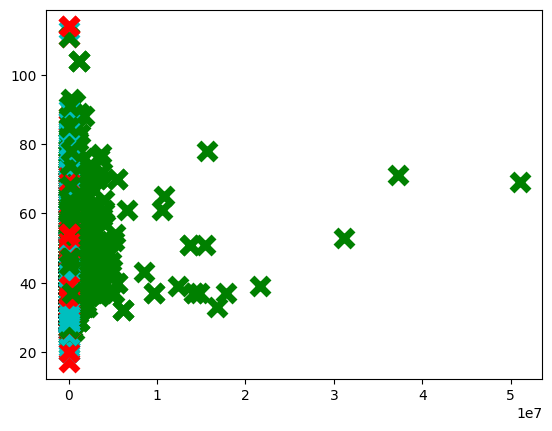

In [43]:
kmeans = K_Means(k=3, data=X, centeriod_init='random', max_iter=1, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
k=3
plot(X,k,index,centroids,orig_centroids)

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco